In [1]:
import pandas as pd
import numpy as np
import spacy

import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt


from urllib.request import urlopen

# Q1

## Chess Transfers

For this question we are going to use the following dataset:

In [2]:
chess = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/chess-transfers/transfers.csv')
chess

,url,ID,Federation,Form.Fed,Transfer Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
3,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
4,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
...,...,...,...,...,...
927,https://ratings.fide.com/fedchange.phtml?year=...,1628313,GER,AUT,1/9/17
928,https://ratings.fide.com/fedchange.phtml?year=...,5200393,SGP,PHI,1/11/17
929,https://ratings.fide.com/fedchange.phtml?year=...,2002515,POL,USA,1/9/17
930,https://ratings.fide.com/fedchange.phtml?year=...,407747,SCO,ENG,1/12/17


The data shows chess grand masters moving one chess federation to another chess federation.

1. Calculate the number of chess masters moved to each federation. You must obtain a pandas data frame with two columns: Federation name and the number of grand masters moved into that specific federation.
2. Sort the table (highest to the lowest.)
3. DIsplay the top 10 federations as a bar chart.
4. Construct a python dictionary where the keys are pairs of federations (A,B) and the values are number of times grand masters moved from federation A to federation B.
5. Filter the dictionary and retain only the pairs that appear 5 or more times.
6. Constuct a **directed** `networkx` graph from the keys of the dictionary you constructed in step 5.
7. Display the graph.

## Solution 1.1
Data contains exact duplicates of some rows. The duplicates were removed first to make a more accurate analysis of the data.

In [7]:
chess = chess.drop_duplicates(keep = "first")

Pandas' groupby method was used then to group the dataframe with a single condition. The output of the method was fed into a new dataframe that satisfies the desired form.

In [8]:
filtered = chess.groupby("Federation")
new_df = {}
for i in filtered:
    i = list(i)
    new_df.update({i[0]:len(i[1])})
out = pd.DataFrame(list(new_df.items()),columns = ['Federation','#Players']) 
out

,Federation,#Players
0,AHO,4
1,ALB,1
2,ALG,1
3,AND,9
4,ARG,1
...,...,...
100,USA,66
101,VEN,4
102,VIE,1
103,WLS,8


## Solution 1.2
The basic `sorted` method was used.

In [12]:
sorted_df = out.sort_values("#Players", ascending = False)
sorted_df

,Federation,#Players
100,USA,66
34,GER,41
29,ESP,32
17,CAN,30
20,CRO,28
...,...,...
38,HON,1
78,PUR,1
79,QAT,1
80,ROM,1


## Solution 1.3
The first 10 rows `sorted_df` was displayed with matplotlib's barchart function.

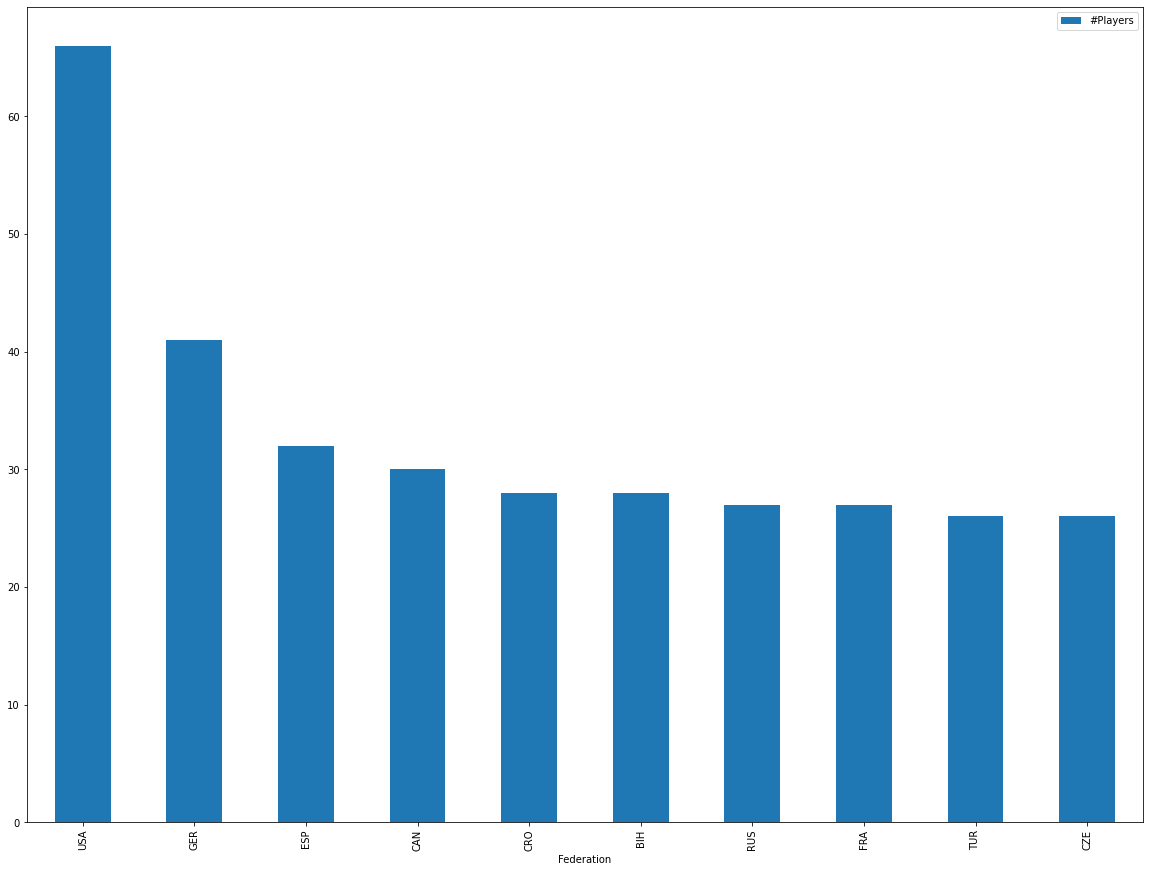

In [14]:
sorted_df[:10].plot.bar(x = "Federation", y = "#Players")
plt.rcParams['figure.figsize'] = [20, 15]

## Solution 1.4
The original dataset was then filtered by 2 columns. The filtration has made it easier for us to create the dictionary of the number of transfers.

In [15]:
filtered_2 = chess.groupby(["Form.Fed", "Federation"])
directed_dic = {}
for i in filtered_2:
    i = list(i)
    directed_dic.update({i[0]: len(i[1])})
directed_dic

{('AHO', 'ARU'): 1,
 ('ALB', 'BEL'): 1,
 ('ALB', 'BIH'): 1,
 ('ALB', 'FRA'): 1,
 ('AND', 'ESP'): 3,
 ('ARG', 'CAN'): 1,
 ('ARG', 'ESP'): 3,
 ('ARG', 'ITA'): 1,
 ('ARG', 'LUX'): 1,
 ('ARG', 'RUS'): 1,
 ('ARG', 'URU'): 1,
 ('ARM', 'BEL'): 1,
 ('ARM', 'CAN'): 1,
 ('ARM', 'ENG'): 1,
 ('ARM', 'RUS'): 1,
 ('ARM', 'UKR'): 1,
 ('ARM', 'USA'): 4,
 ('AUS', 'BLR'): 1,
 ('AUS', 'HKG'): 1,
 ('AUS', 'JPN'): 1,
 ('AUS', 'SUI'): 1,
 ('AUS', 'TPE'): 1,
 ('AUT', 'GER'): 2,
 ('AUT', 'LIE'): 1,
 ('AUT', 'SUI'): 1,
 ('AZE', 'BEL'): 1,
 ('AZE', 'RUS'): 1,
 ('AZE', 'TUR'): 7,
 ('AZE', 'USA'): 2,
 ('BAN', 'CZE'): 1,
 ('BAN', 'FRA'): 1,
 ('BAR', 'GUY'): 1,
 ('BEL', 'AZE'): 1,
 ('BEL', 'FRA'): 1,
 ('BEL', 'TUR'): 2,
 ('BEL', 'YUG'): 1,
 ('BIH', 'CRO'): 7,
 ('BIH', 'GER'): 2,
 ('BIH', 'MNE'): 1,
 ('BIH', 'NED'): 1,
 ('BIH', 'SRB'): 3,
 ('BIH', 'SUI'): 1,
 ('BIH', 'TUR'): 1,
 ('BIH', 'USA'): 1,
 ('BLR', 'AUS'): 1,
 ('BLR', 'CAN'): 1,
 ('BLR', 'FRA'): 1,
 ('BLR', 'ISR'): 1,
 ('BLR', 'POL'): 1,
 ('BLR', 'SWE'): 1,


## Solution 1.5
A basic filtration done by imposing a restriction upon the above dictionary's values.

In [16]:
new = {}
for (key, value) in directed_dic.items():
    if value >= 5:
        new.update({key: value})
new

{('AZE', 'TUR'): 7,
 ('BIH', 'CRO'): 7,
 ('CHN', 'SIN'): 5,
 ('CRO', 'BIH'): 7,
 ('CUB', 'ESP'): 5,
 ('CUB', 'USA'): 5,
 ('ENG', 'WLS'): 7,
 ('ESP', 'AND'): 6,
 ('FRA', 'MNC'): 17,
 ('GER', 'SUI'): 6,
 ('IND', 'USA'): 10,
 ('ISR', 'CAN'): 5,
 ('ROU', 'FRA'): 6,
 ('RUS', 'CZE'): 7,
 ('RUS', 'GER'): 11,
 ('RUS', 'UKR'): 6,
 ('SCG', 'CRO'): 8,
 ('SRB', 'BIH'): 16,
 ('SRB', 'CRO'): 6,
 ('SVK', 'CZE'): 8,
 ('UKR', 'GER'): 10,
 ('UKR', 'RUS'): 12,
 ('UKR', 'USA'): 5}

## Solution 1.6
A directed graph was created with networkx's DiGraph function that takes the pairs above, which are the keys of the dictionary, as it's argument.

In [17]:
graph = nx.DiGraph()
graph.add_edges_from(new.keys())

## Solution 1.7
The graph was then displayed. (Zooming in a bit on the picture makes it easier to read.)

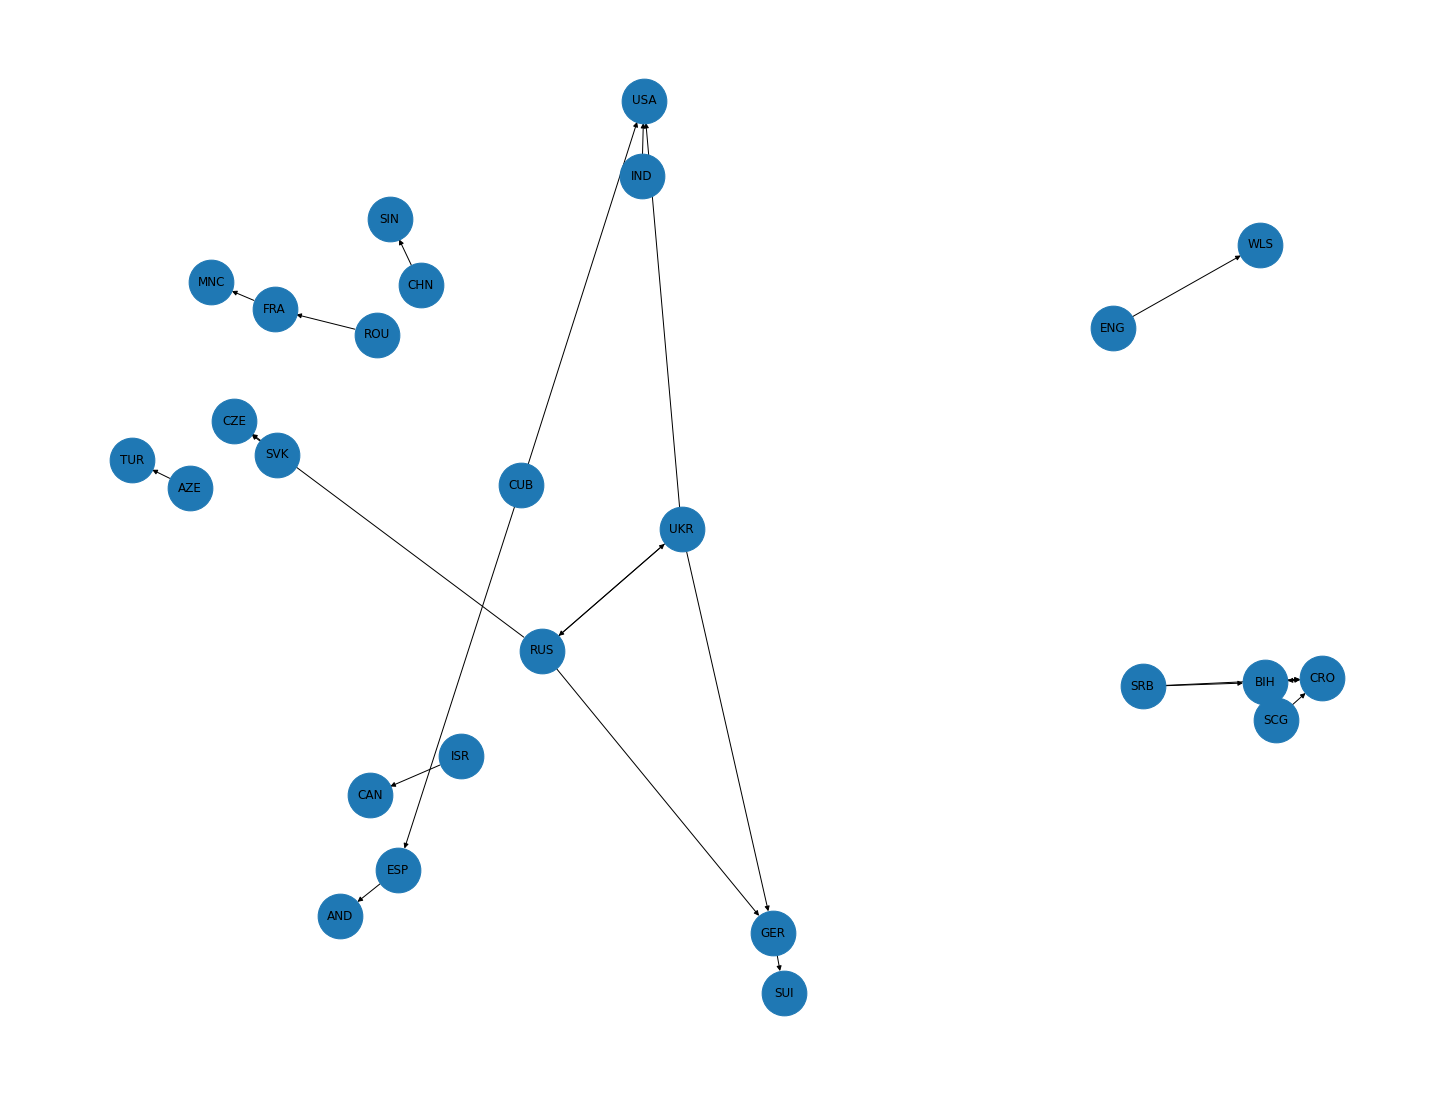

In [20]:
nx.draw(graph, with_labels = True, node_size =2000)

# Q2

## NBA Players

For this question we are going to use the following dataset:

In [4]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


The data contains play-by-play information about all games from the 2018-2019 NBA season. We are interested in the columns 'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER3_ID', 'PLAYER3_NAME'. If the specific entry involves two or more players PLAYER2_ID, PLAYER2_NAME, PLAYER3_ID, PLAYER3_NAME are going to be non-empty. 

1. Construct a list of pairs that contains pairs of player names in interaction. If the play-by-play involves 3 players A,B and C you must have 3 entries: (A,B), (A,C) and (B,C) (write the pairs in the dictionary order).
2. Construct a python  dictionary where the keys are pairs of player names and the values are the number of times each pair appears in the list you constructed in step 1.
3. Filter the list and keep only the entries that appear more than 74 times (i.e. 75 or more).
4. Construct a `igraph` graph from the data you obtained from step 3.
5. Display the graph.
6. List the maximal cliques using the `maximal_cliques` of the graph data structure.

## Solution 2.1
The dataset was first sorted alphabetically to ensure that the later steps are also done in this order. Then, the sorted data was cleaned of rows in which no player had a role. The cleaned data is then grouped by the first actor(player) that is involved in the action.

In [21]:
tobe = NBA.sort_values("PLAYER1_NAME", ascending = True)
tobe.dropna(subset = ["PLAYER1_NAME"], inplace=True)
processible = tobe.groupby("PLAYER1_NAME")

The grouped data is then fed into a chain of restrictions. The chain checks whether it was a 2-player action or a 3-player action, and then creates tuples of the action accordingly. The tuples are stored in a list named `interaction_list`.

In [22]:
interaction_list = []
for i in processible:
    pn = i[0]
    dummy_df = i[1]
    dummy_df = dummy_df.reset_index()
    for j in range(len(dummy_df)):
        if dummy_df["PLAYER3_NAME"][j] != dummy_df["PLAYER3_NAME"][j] and dummy_df["PLAYER2_NAME"][j] == dummy_df["PLAYER2_NAME"][j] :
            interaction_list.append((pn, dummy_df["PLAYER2_NAME"][j]))
        elif dummy_df["PLAYER3_NAME"][j] == dummy_df["PLAYER3_NAME"][j] and dummy_df["PLAYER2_NAME"][j] == dummy_df["PLAYER2_NAME"][j]: 
            interaction_list.append((pn, dummy_df["PLAYER2_NAME"][j]))
            interaction_list.append((pn, dummy_df["PLAYER3_NAME"][j]))
            interaction_list.append((dummy_df["PLAYER2_NAME"][j], dummy_df["PLAYER3_NAME"][j]))

In [23]:
interaction_list

[('Aaron Gordon', 'Wes Iwundu'),
 ('Aaron Gordon', 'Ricky Rubio'),
 ('Aaron Gordon', 'D.J. Augustin'),
 ('Aaron Gordon', 'Jerian Grant'),
 ('Aaron Gordon', 'Thabo Sefolosha'),
 ('Aaron Gordon', 'Jonathan Isaac'),
 ('Aaron Gordon', 'Evan Fournier'),
 ('Aaron Gordon', 'Jae Crowder'),
 ('Aaron Gordon', 'Jarell Martin'),
 ('Aaron Gordon', 'D.J. Augustin'),
 ('Aaron Gordon', 'Glenn Robinson III'),
 ('Aaron Gordon', 'D.J. Augustin'),
 ('Aaron Gordon', 'Jonathan Isaac'),
 ('Aaron Gordon', 'D.J. Augustin'),
 ('Aaron Gordon', 'Jaylen Brown'),
 ('Aaron Gordon', 'Jamal Murray'),
 ('Aaron Gordon', 'Blake Griffin'),
 ('Aaron Gordon', 'Jonathan Isaac'),
 ('Aaron Gordon', 'Wes Iwundu'),
 ('Aaron Gordon', 'Joe Ingles'),
 ('Aaron Gordon', 'Evan Fournier'),
 ('Aaron Gordon', 'Donovan Mitchell'),
 ('Aaron Gordon', 'Jerian Grant'),
 ('Aaron Gordon', 'Jayson Tatum'),
 ('Aaron Gordon', 'D.J. Augustin'),
 ('Aaron Gordon', 'Jonathan Isaac'),
 ('Aaron Gordon', 'Michael Carter-Williams'),
 ('Aaron Gordon', 'Joh

## Solution 2.2
With the help of the list above, a dictionary was created that has unique tuples as its keys and the count of tuples in the list as its values.

In [24]:
interaction_set = set(interaction_list)
interaction_dict = {}
for j in interaction_set:
    interaction_dict.update({j:interaction_list.count(j)})
interaction_dict

{('Juancho Hernangomez', 'Dragan Bender'): 1,
 ('Jaren Jackson Jr.', 'Jrue Holiday'): 2,
 ('Yogi Ferrell', 'Nemanja Bjelica'): 10,
 ('Marc Gasol', 'Tyson Chandler'): 1,
 ('Chasson Randle', 'Ryan Arcidiacono'): 4,
 ('Dennis Smith Jr.', 'Trey Burke'): 2,
 ('Jordan Clarkson', 'JJ Redick'): 3,
 ('Theo Pinson', 'Ricky Rubio'): 1,
 ('Georges Niang', 'Ekpe Udoh'): 9,
 ('Tristan Thompson', 'JR Smith'): 5,
 ('Taurean Prince', 'Donovan Mitchell'): 1,
 ('Derrick Favors', 'Lance Stephenson'): 1,
 ('Enes Kanter', 'Brandon Ingram'): 1,
 ('Patrick Patterson', 'Chris Paul'): 1,
 ('Blake Griffin', "Royce O'Neale"): 1,
 ('Tim Hardaway Jr.', 'Giannis Antetokounmpo'): 4,
 ('James Harden', 'Rudy Gobert'): 6,
 ('Jabari Parker', 'Anthony Davis'): 1,
 ('Garrett Temple', 'MarShon Brooks'): 20,
 ('Thomas Bryant', 'JaVale McGee'): 1,
 ('Duncan Robinson', 'Dwyane Wade'): 8,
 ('Andre Drummond', 'Russell Westbrook'): 1,
 ('Steven Adams', 'Jalen Brunson'): 2,
 ('Giannis Antetokounmpo', 'Jon Leuer'): 1,
 ('JaKarr Sam

## Solution 2.3
Again, a basic restriction was imposed upon the `interaction_dict`'s values to filter the items that have 75 or more as their values.

In [25]:
filtered_dict = {}
for (key, value) in interaction_dict.items():
    if value >=75:
        filtered_dict.update({key:value})
filtered_dict

{('Justise Winslow', 'Josh Richardson'): 76,
 ('Rudy Gobert', 'Joe Ingles'): 117,
 ('Jarrett Allen', "D'Angelo Russell"): 159,
 ('Pascal Siakam', 'OG Anunoby'): 75,
 ("Royce O'Neale", 'Joe Ingles'): 100,
 ('Rudy Gay', 'Davis Bertans'): 75,
 ('Stephen Curry', 'Draymond Green'): 117,
 ('Malcolm Brogdon', 'Giannis Antetokounmpo'): 92,
 ('James Harden', 'Chris Paul'): 98,
 ('Clint Capela', 'Chris Paul'): 98,
 ('Monte Morris', 'Jamal Murray'): 77,
 ('Nemanja Bjelica', 'Marvin Bagley III'): 88,
 ('Russell Westbrook', 'Paul George'): 85,
 ('Myles Turner', 'Darren Collison'): 148,
 ('Serge Ibaka', 'Fred VanVleet'): 78,
 ('Nikola Vucevic', 'Evan Fournier'): 127,
 ('Willie Cauley-Stein', "De'Aaron Fox"): 173,
 ('Reggie Jackson', 'Ish Smith'): 89,
 ('CJ McCollum', 'Damian Lillard'): 95,
 ("De'Aaron Fox", 'Yogi Ferrell'): 83,
 ('Thaddeus Young', 'Domantas Sabonis'): 119,
 ('Jake Layman', 'Evan Turner'): 94,
 ('Josh Richardson', 'Dwyane Wade'): 128,
 ('Nikola Vucevic', 'Aaron Gordon'): 120,
 ('JJ R

## Solution 2.4
The list of players that were involved in 75 or more actions are set to be the vertices of the `igraph`. The edges are obtained from the keys of the dictionary above. (I've tried to add the weights(#of plays) to the edges as well but somehow the method to do so seemed very complicated to me.)

In [27]:
vertices = []
for i in list(filtered_dict.keys()):
    vertices.append(i[0])
    vertices.append(i[1])

vertices = list(set(vertices))
edges = list(filtered_dict.keys())

g = ig.Graph()
g.add_vertices(vertices)
for i in range(len(g.vs)):
    g.vs[i]["id"]= str(vertices[i])
    g.vs[i]["label"]= str(vertices[i])
g.add_edges(edges)
for i in range(len(g.es)):
    g.es[i]["id"]= str(edges[i])
    g.es[i]["label"]= str(edges[i])

## Solution 2.5
The graph is then displayed with the help of the `matplotlib` library. (Again, zooming in might help to read the node labels.)

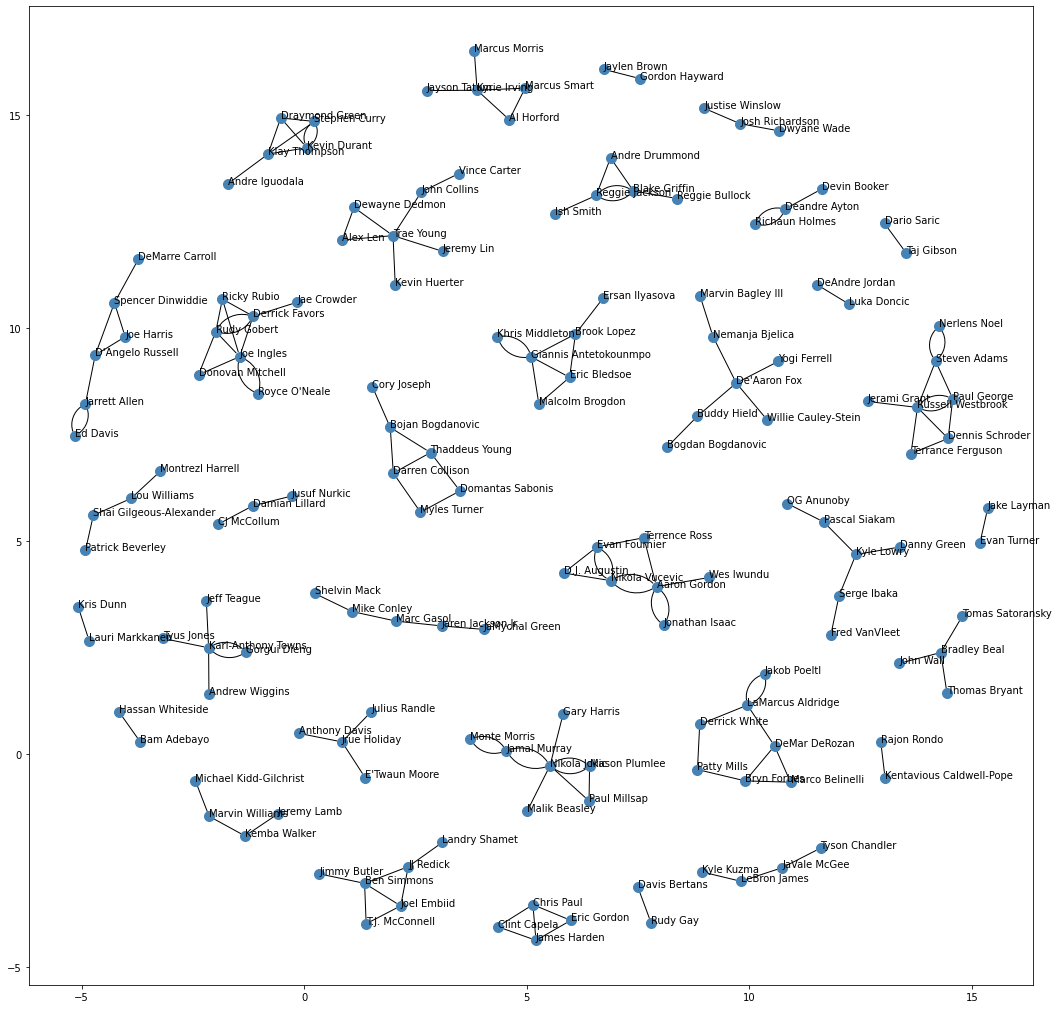

In [29]:
layout = g.layout(layout='auto')
fig, ax = plt.subplots(figsize = (18,18))
ig.plot(g, target=ax, vertex_label = vertices, edge_weight = list(filtered_dict.values()))
dots = ax.get_children()[0]
dots.set_sizes([100])

## Solution 2.6
`igraph`'s maximal_cliques() method was used to do the task. However, this method returned tuples that consisted of numbers. In order to return meaningful cliques, the numbers were matched with the graph's vertice list which attached numbers to the names of the vertices.

In [31]:
maxm_cliq = []
for x in g.maximal_cliques():
    dummy = []
    for j in x:
        dummy.append(list(g.vs)[j]["name"])
    maxm_cliq.append(tuple(dummy))
maxm_cliq

[('Bradley Beal', 'John Wall'),
 ('Bradley Beal', 'Thomas Bryant'),
 ('Bradley Beal', 'Tomas Satoransky'),
 ('Ish Smith', 'Reggie Jackson'),
 ('Jae Crowder', 'Derrick Favors'),
 ('Jeff Teague', 'Karl-Anthony Towns'),
 ('DeAndre Jordan', 'Luka Doncic'),
 ('Lauri Markkanen', 'Kris Dunn'),
 ('Shelvin Mack', 'Mike Conley'),
 ('Michael Kidd-Gilchrist', 'Marvin Williams'),
 ('Damian Lillard', 'CJ McCollum'),
 ('Damian Lillard', 'Jusuf Nurkic'),
 ('Cory Joseph', 'Bojan Bogdanovic'),
 ('Andrew Wiggins', 'Karl-Anthony Towns'),
 ('Julius Randle', 'Jrue Holiday'),
 ('JaMychal Green', 'Jaren Jackson Jr.'),
 ('Josh Richardson', 'Justise Winslow'),
 ('Josh Richardson', 'Dwyane Wade'),
 ('Fred VanVleet', 'Serge Ibaka'),
 ('Anthony Davis', 'Jrue Holiday'),
 ('DeMarre Carroll', 'Spencer Dinwiddie'),
 ('Jaren Jackson Jr.', 'Marc Gasol'),
 ('Landry Shamet', 'JJ Redick'),
 ('Jake Layman', 'Evan Turner'),
 ('Shai Gilgeous-Alexander', 'Lou Williams'),
 ('Shai Gilgeous-Alexander', 'Patrick Beverley'),
 ('Jru

# Q3

## Charles Dickens' *Great Expectations*

For this question we are going to use the following dataset:

These three libraries were imported to tokenize (sent_tokenize, word_tokenize) and format (regex) the text.

In [32]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import regex as re

In [5]:
with urlopen('https://www.gutenberg.org/files/1400/1400-0.txt') as f:
    raw = f.read()

greatExpectations = raw[1900:1039269].decode('utf8')

These are the names of the major characters in the novel:

In [6]:
names = [
 'Joe',
 'Pip',
 'Wopsle',
 'Hubble',
 'Pumblechook',
 'Richard',
 'Wopsle',
 'Biddy',
 'Havisham',
 'Joseph',
 'Sarah',
 'Estella',
 'Orlick',
 'Mike',
 'Wemmick',
 'Herbert',
 'Pocket',
 'Jane',
 'Flopson',
 'Coiler',
 'Drummle',
 'Jack',
 'Spider',
 'Handel',
 'Herbert',
 'Clara',
 'Skiffins',
 'Magwitch',
 'Provis',
 'Compeyson',
 'Tom',
 'Bill',
 'Barley',
 'Orlick',
 'William']

names = set(sorted(names))
names

{'Barley',
 'Biddy',
 'Bill',
 'Clara',
 'Coiler',
 'Compeyson',
 'Drummle',
 'Estella',
 'Flopson',
 'Handel',
 'Havisham',
 'Herbert',
 'Hubble',
 'Jack',
 'Jane',
 'Joe',
 'Joseph',
 'Magwitch',
 'Mike',
 'Orlick',
 'Pip',
 'Pocket',
 'Provis',
 'Pumblechook',
 'Richard',
 'Sarah',
 'Skiffins',
 'Spider',
 'Tom',
 'Wemmick',
 'William',
 'Wopsle'}

1. Split the text into sentences using a sentence tokenizer from your favorite NLP library.
2. Construct a list of pairs of names: a pair of names (A,B) appears in the list if and only if both A and B appears in the same sentence. When you store the pair (A,B) in the list make sure A appears before B in the alphabetical order.
3. Construct a python dictionary where the keys are pairs of names and values are the number of times each pair appears in the list you constructed in step 2.
4. Filter the list and retain only those pairs that appear more than twice (i.e. 3 or more).
5. Construct a `networkx` graph using the pairs you have from step 4.
6. Display the graph.

## Solution 3.1
The sent_tokenize function was used to tokenize the text.

In [33]:
tokenized = sent_tokenize(greatExpectations)

## Solution 3.2
All the possible combinations of any two names (in which the ordering is not important) were first put into a list.

In [35]:
tuples = []
ordered = sorted(list(names))
for x in range(len(names)):
    for j in range(x+1, len(names)):
        tuples.append((ordered[x], ordered[j]))

 Then, each sentence was analyzed in whether it contained the elements of the pair or not. If a sentence did contain the pair, then the pair was appended to a list `interacted`.

In [36]:
interacted = []
for x in tokenized:
    dummy = word_tokenize(x)
    for i in tuples:
        if i[0] in dummy and i[1] in dummy:
            interacted.append(i)

## Solution 3.3
A method, similar to that was done in the 2nd solution, was used to count the number of times that a pair appears in a list, and then the (pair:# of times) is put into a dictionary.

In [37]:
interaction_dict = {}
for j in set(interacted):
    interaction_dict.update({j:interacted.count(j)})
interaction_dict

{('Compeyson', 'Havisham'): 1,
 ('Jack', 'Wemmick'): 3,
 ('Hubble', 'Pip'): 1,
 ('Joe', 'Sarah'): 1,
 ('Joe', 'Orlick'): 5,
 ('Pocket', 'Wemmick'): 2,
 ('Flopson', 'Herbert'): 1,
 ('Jack', 'Wopsle'): 2,
 ('Handel', 'Provis'): 1,
 ('Biddy', 'Wopsle'): 5,
 ('Biddy', 'Estella'): 4,
 ('Hubble', 'Wopsle'): 4,
 ('Estella', 'Pocket'): 2,
 ('Havisham', 'Sarah'): 6,
 ('Drummle', 'Estella'): 3,
 ('Magwitch', 'Provis'): 2,
 ('Havisham', 'Provis'): 3,
 ('Herbert', 'Pocket'): 11,
 ('Havisham', 'Orlick'): 1,
 ('Herbert', 'Jack'): 3,
 ('Pocket', 'Spider'): 1,
 ('Pumblechook', 'Wopsle'): 7,
 ('Pip', 'Pumblechook'): 5,
 ('Havisham', 'Joe'): 35,
 ('Richard', 'Tom'): 6,
 ('Havisham', 'Wemmick'): 3,
 ('Pocket', 'Sarah'): 20,
 ('Estella', 'Pip'): 7,
 ('Herbert', 'Pip'): 2,
 ('Biddy', 'Orlick'): 2,
 ('Bill', 'Clara'): 2,
 ('Herbert', 'Tom'): 3,
 ('Barley', 'Provis'): 2,
 ('Pumblechook', 'William'): 4,
 ('Mike', 'Wemmick'): 3,
 ('Compeyson', 'Magwitch'): 2,
 ('Orlick', 'Pip'): 2,
 ('Drummle', 'Orlick'): 1,
 

## Solution 3.4
The dictionary above is then filtered based on its values. If the value is less than 3, the item is dropped.

In [39]:
filtered_int_dict = {}
for (key,value) in interaction_dict.items():
    if value>2:
        filtered_int_dict.update({key:value})

## Solution 3.5
networkx's built-in `Graph` function was used to create a graph from the filtered dictionary's values.

In [40]:
book_graph=nx.Graph(filtered_int_dict.keys())

## Solution 3.6
The graph is displayed in kamada-kawai style.

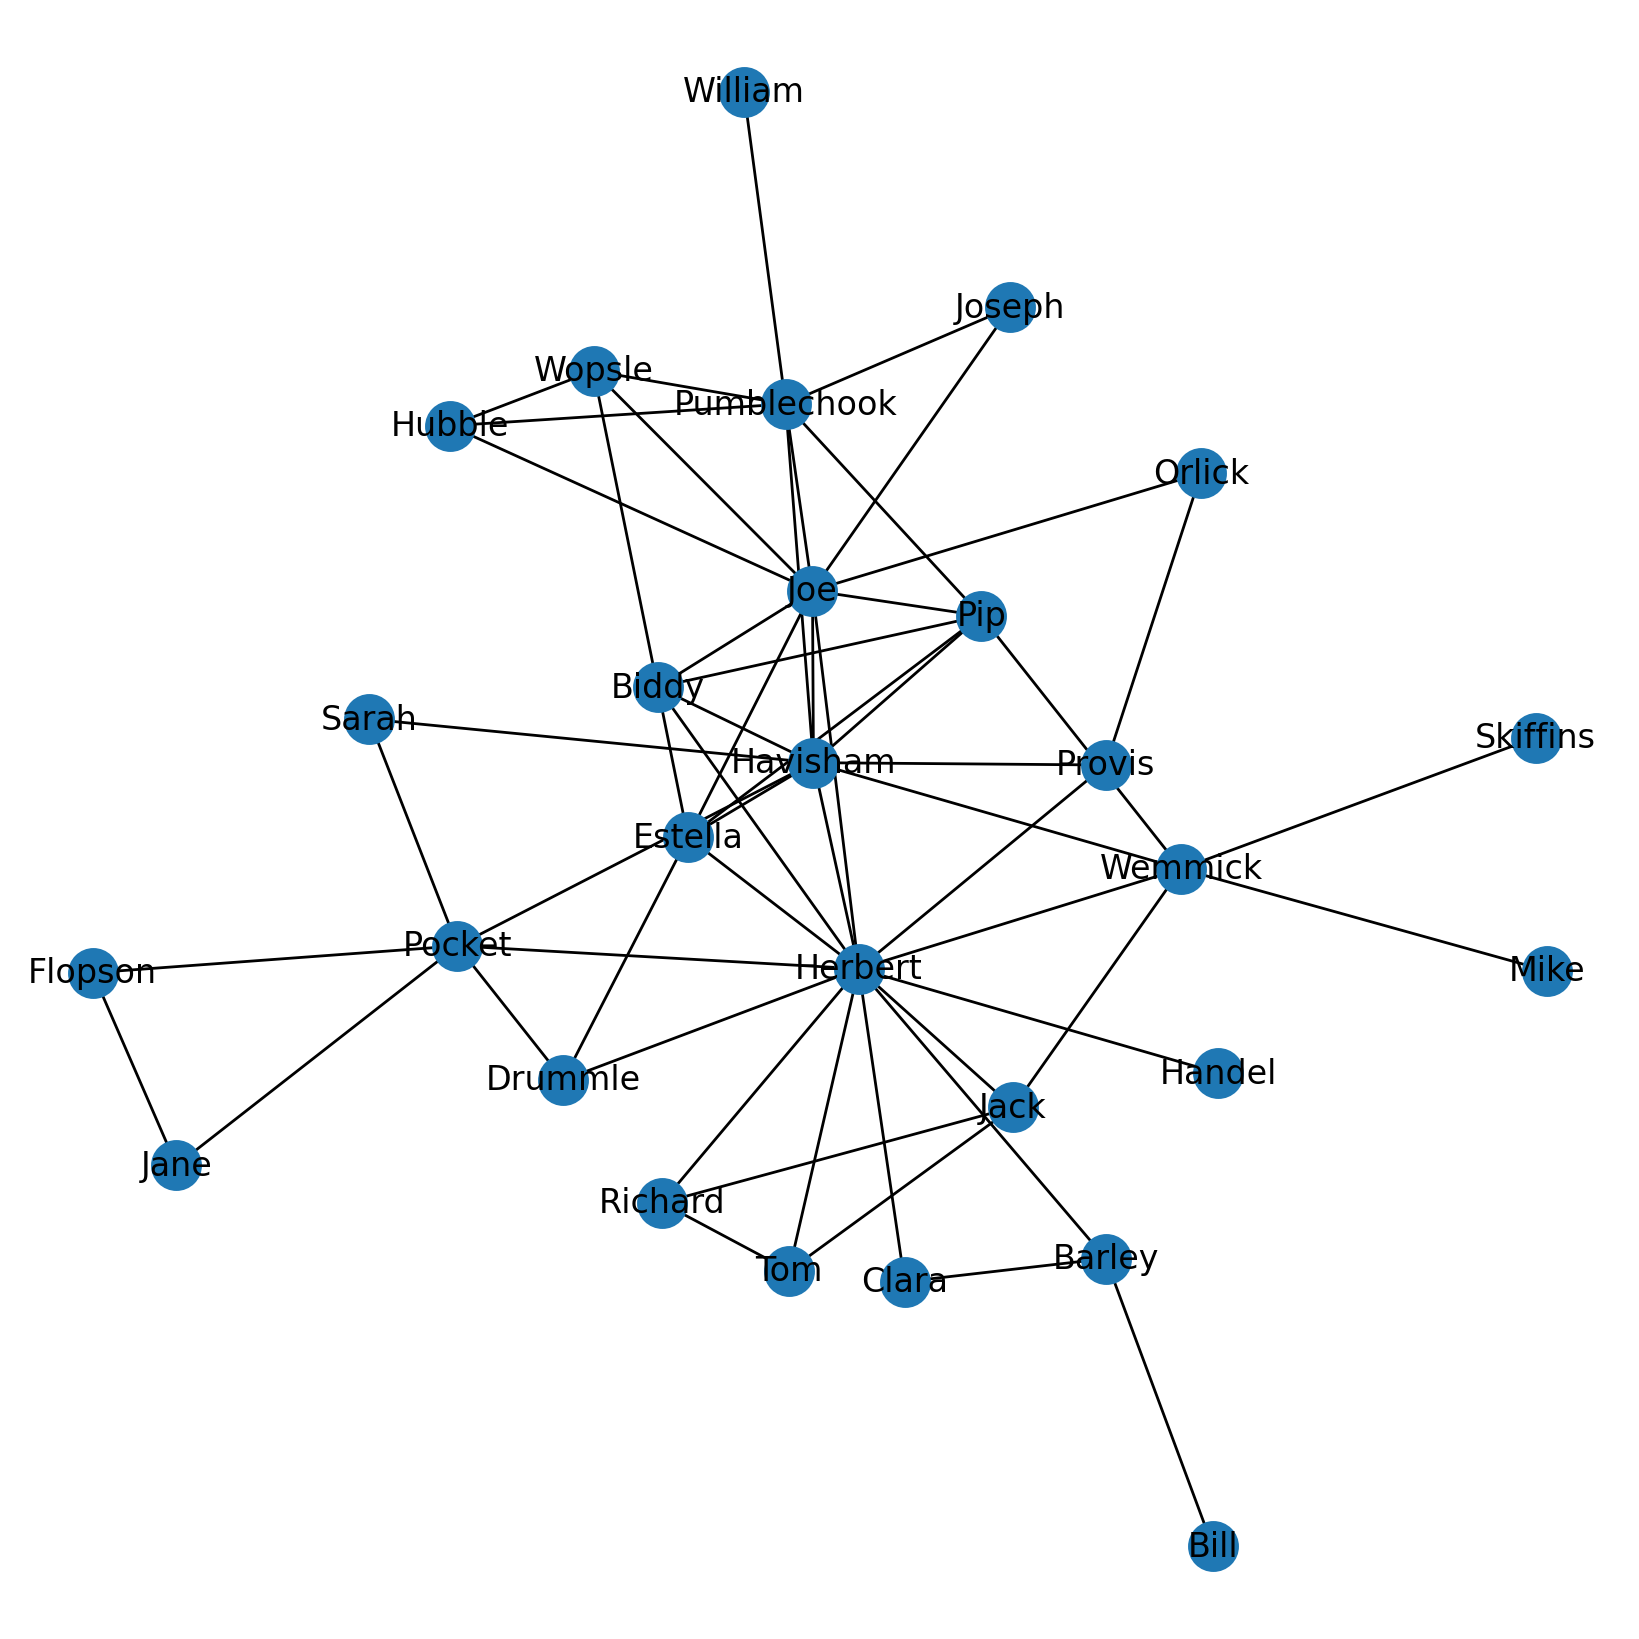

In [41]:
fig = plt.figure(1, figsize=(8, 8),  dpi =200)
nx.draw_kamada_kawai(book_graph, with_labels = True)